[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20Análisis%20Estadístico%20de%20Datos/notebooks/1_Fundamentos_Analisis_Estadistico.ipynb)

# 2. Introducción al Análisis Estadístico de Datos

El análisis estadístico de datos es el proceso de:
    
   - recopilar
   - organizar 
   - describir 
   - interpretar datos 

para **extraer conclusiones** y apoyar la toma de **decisiones informadas**. 

En esencia, la estadística **“se encarga de recabar datos, organizarlos, analizarlos y presentarlos para poder predecir situaciones futuras”**

![Types](../imgs/Tipos_analisis.png)

## Breve ejemplo práctico
### Análisis Estadístico Descriptivo

In [68]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generamos datos simulados de salarios en una empresa (en miles de dólares)
np.random.seed(42)
salarios = np.random.normal(loc=50, scale=10, size=100)  # Media 50, Desviación 10

# Crear un DataFrame con los datos simulados
df = pd.DataFrame({'Salarios': salarios})
df.describe()

,Salarios
count,100.000000
mean,48.961535
std,9.081684
min,23.802549
25%,43.990943
50%,48.730437
75%,54.059521
max,68.522782


In [69]:
media = df['Salarios'].mean()
mediana = df['Salarios'].median()

## Visualización de los datos

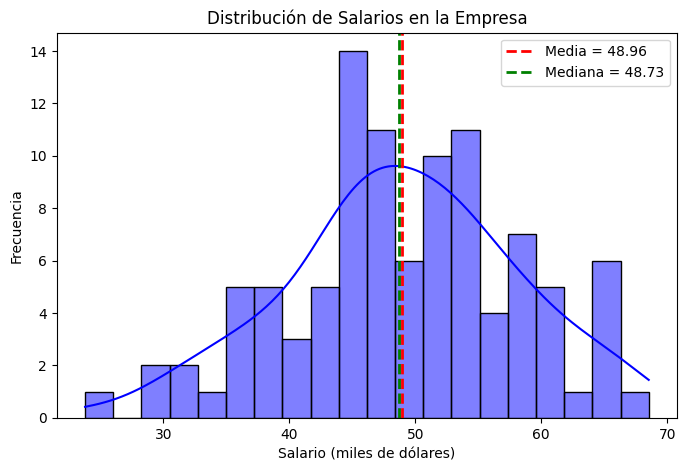

In [70]:
plt.figure(figsize=(8,5))
sns.histplot(df['Salarios'], kde=True, bins=20, color='blue')
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Media = {media:.2f}')
plt.axvline(mediana, color='g', linestyle='dashed', linewidth=2, label=f'Mediana = {mediana:.2f}')
plt.legend()
plt.title("Distribución de Salarios en la Empresa")
plt.xlabel("Salario (miles de dólares)")
plt.ylabel("Frecuencia")
plt.show()

## Inferencia Estadística (Prueba de Hipótesis)

In [71]:
# Prueba t de una muestra
t_stat, p_value = stats.ttest_1samp(df['Salarios'], popmean=50)

print(f"Prueba de Hipótesis (Test t):")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Evaluación de la hipótesis
alpha = 0.05  # Nivel de significancia 5%
if p_value < alpha:
    print("Rechazamos H₀: El salario promedio es significativamente diferente de 52K")
else:
    print("No se rechaza H₀: No hay evidencia suficiente para decir que el salario promedio es diferente de 52K")


Prueba de Hipótesis (Test t):
Estadístico t: -1.1435
Valor p: 0.2556
No se rechaza H₀: No hay evidencia suficiente para decir que el salario promedio es diferente de 52K


-------
# 2.1. Tipos de datos estadísticos

Para construir un **pipeline** adecuado en ciencia de datos, debemos tener un buen entendimiento del tipo de variables que estaremos percibiendo de los diferentes conjuntos de datos (datasets) que nos podamos encontrar.

---

Veamos ahora los [conceptos estadísticos básicos](https://towardsdatascience.com/introduction-to-statistics-in-python-6f5a8876c994) relacionados con el tipo de datos que se estudian.

Se llama **variable estadística** a cada una de las características que pueden estudiarse de la población (o de muestras).

![img](https://luminousmen.com/media/data-types-in-ds.jpeg)

Los datos <font color = red>**cualitativos**</font> (también llamados *categóricos*) describen cualidades o categorías y no se refieren a cantidades numéricas; por ejemplo, el color de ojos, el género o nivel educativo son datos cualitativos. Estos datos pueden incluso representarse con números (p. ej., usar 1 para Femenino y 0 para Masculino), pero esos números son solo etiquetas sin significado aritmético

Los datos cualitativos se subdividen en:

  - **Datos nominales**: Categorías sin orden intrínseco (p. ej., nacionalidad, color favorito, marcas). Si intercambiamos las etiquetas, el significado no cambia.
    
  - **Datos ordinales**: Categorías ordenadas de forma jerárquica o por rango (p. ej., nivel de satisfacción bajo/medio/alto, tamaño de camiseta S/M/L). Aquí el orden sí importa (alto > medio > bajo), aunque las diferencias entre categorías no son numéricamente constantes.

---

Por otro lado, los datos <font color = blue>**cuantitativos**</font> son numéricos y resultan de conteos o mediciones (por ejemplo, la estatura de una persona en centímetros, la cantidad de ventas mensuales o la temperatura en grados). Estos datos sí admiten operaciones aritméticas significativas. Los datos cuantitativos se clasifican a su vez en:

  - **Discretos**: Aquellos que solo pueden tomar ciertos valores específicos (típicamente enteros) resultantes de un conteo. Por ejemplo, el número de hijos por familia (no se pueden tener 2.5 hijos) o la cantidad de autos vendidos en un día.

  - **Continuos**: Aquellos que pueden tomar cualquier valor dentro de un rango dado, normalmente resultado de mediciones. Por ejemplo, el peso de una persona (podría ser 70.2 kg, 70.25 kg, etc.) o el tiempo que tarda un algoritmo en ejecutarse. Entre dos valores continuos siempre es posible encontrar otros intermedios (limitados solo por la precisión del instrumento de medida).


### 2.1.1. Análisis de datos categóricos con Python

---

Cuando trabajamos con estadísticas, es importante reconocer los diferentes tipos de datos: numéricos (discretos y continuos) y categóricos. Los datos no son más que observaciones del mundo en el que vivimos, por tanto, los mismos pueden venir en diferentes maneras, no solo de forma numérica. 

---

Los datos se dividen en categorías, pero los números colocados en cada categoría tienen un significado. Por ejemplo, la calificación de un restaurante en una escala de 0 (bajo) a 5 (más alta) estrellas representa datos ordinales. Los datos ordinales son a menudo tratados como datos categóricos, en el sentido que se suelen agrupar y ordenar. Sin embargo, a diferencia de los datos categóricos, los números sí tienen un significado matemático.

---

![img](https://files.realpython.com/media/Descriptive-Statistics-in-Python_Watermarked.fec81e9a41f9.jpg)

In [72]:
#Uncomment if needed
#!pip install pydataset

In [73]:
# importando modulos necesarios
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Se debe recordar que para la primera ejecución de este código, 
#se debe habilidar la instalación de 'pydataset'

from pydataset import data
%matplotlib notebook
#Añadir la siguiente línea de código
%matplotlib inline 

In [74]:
# importando dataset
titanic = data('titanic')
# ver primeros 10 registros
titanic.head(10)
# visualizar toda la tabla, recordemos que el TIPO DE DATO de 'titanic' es un DataFrame de la paquetería Pandas
# titanic

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
6,1st class,adults,man,yes
7,1st class,adults,man,yes
8,1st class,adults,man,yes
9,1st class,adults,man,yes
10,1st class,adults,man,yes


* La función [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) se usa para imprimir un resumen conciso de un DataFrame. Este método imprime información, incluido el tipo de índice y los tipos de columna, los valores no nulos y el uso de la memoria.

In [75]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1316 entries, 1 to 1316
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     1316 non-null   object
 1   age       1316 non-null   object
 2   sex       1316 non-null   object
 3   survived  1316 non-null   object
dtypes: object(4)
memory usage: 51.4+ KB


* La función [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) se utiliza para ver algunos detalles estadísticos básicos como percentiles, media, std, etc. de un DataFrame o una serie de valores numéricos. Cuando este método se aplica a una serie de Strings, devuelve una salida diferente que se muestra en los ejemplos a continuación.

In [76]:
titanic.describe()

,class,age,sex,survived
count,1316,1316,1316,1316
unique,3,2,2,2
top,3rd class,adults,man,no
freq,706,1207,869,817


<center><font size=5 color = purple> El problema con datos como estos, y en general con la mayoría de las tablas de datos, es que nos presentan mucha información y no nos permiten ver que es lo que realmente sucede o sucedió. </font></center>

Por tanto, deberíamos procesarla de alguna manera para hacernos una imagen de lo que los datos realmente representan y nos quieren decir; y que mejor manera para hacernos una imagen de algo que utilizar **visualizaciones**.

-------

Una buena **visualización de los datos** puede revelar cosas que es probable que no podamos ver en una *tabla de números* y nos ayudará a pensar con claridad acerca de los <font color = red>**patrones**</font> y <font color = red>**relaciones**</font> que pueden estar *escondidos* en los datos. 


También nos va a ayudar a encontrar las características y patrones más importantes o los casos que son realmente excepcionales y no deberíamos de encontrar.

--------

### 2.1.2. Tablas de frecuencia

Para hacernos una *imagen de los datos*, lo primero que tenemos que hacer es agruparlos. 

Al armar diferentes grupos nos vamos acercando a la comprensión de los datos.

**La idea es ir agrupando las cosas que parecen ir juntas, para poder ver como se distribuyen a través de las diferentes categorías**. 

Para los *datos categóricos*, agrupar es fácil; simplemente debemos contar el número de ítems que corresponden a cada categoría y juntarlos. 

Una forma en la que podemos agrupar nuestro dataset del Titanic es contando las diferentes clases de pasajeros. Podemos organizar estos conteos en una *tabla de frecuencia*, que registra los totales y los nombres de las categorías utilizando la función [**value_counts**](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) que nos proporciona Pandas del siguiente modo:

In [77]:
# tabla de frecuencia de clases de pasajeros
titanic['class'].value_counts()

class
3rd class    706
1st class    325
2nd class    285
Name: count, dtype: int64

Contar las cantidad de apariciones de cada categoría puede ser útil, pero a veces puede resultar más útil saber la *fracción* o proporción de los datos de cada **categoría**, así que podríamos entonces dividir los recuentos por el total de casos para obtener los porcentajes que representa cada categoría.


---

Una tabla de **frecuencia relativa** muestra los porcentajes, en lugar de los recuentos de los valores en cada categoría. Ambos tipos de tablas muestran cómo los casos se distribuyen a través de las categorías. 

De esta manera, ellas describen la distribución de una variable categórica, ya que enumeran las posibles categorías y nos dicen con qué frecuencia se produce cada una de ellas.

In [78]:
# tabla de frecuencia relativa de pasajeros
100 * titanic['class'].value_counts() / len(titanic['class'])

class
3rd class    53.647416
1st class    24.696049
2nd class    21.656535
Name: count, dtype: float64

### 2.1.3. Gráficos de pastel y barras

---

El gráfico de barras nos ayuda a darnos una impresión visual más precisa de la distribución de nuestros datos. 

La altura de cada barra muestra el recuento de su categoría. Los barras tienen el mismo ancho, por lo que sus alturas determinan sus áreas, y estas áreas son proporcionales a los recuentos en cada categoría. 

De esta forma, podemos ver fácilmente que había más del doble de pasajeros de tercera clase, que de primera o segunda clase. 

Los gráficos de barras hacen que este tipo de comparaciones sean fáciles y naturales. Veamos como podemos crearlos de forma sencilla utilizando el método **plot** dentro de un **DataFrame** de **Pandas**.

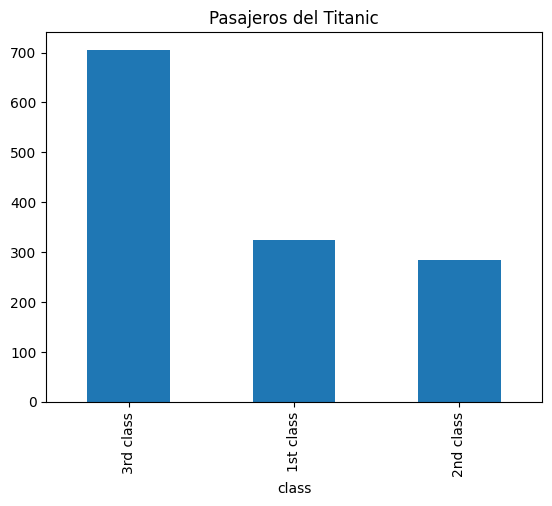

In [79]:
# Gráfico de barras de pasajeros del Titanic
# Se puede añadir %matplotlib inline
plot = titanic['class'].value_counts().plot(kind='bar', title='Pasajeros del Titanic')

Si quisiéramos enfocarnos en la proporción relativa de los pasajeros de cada una de las clases, simplemente podemos sustituir a los recuentos con porcentajes y utilizar un *gráfico de barras de frecuencias relativas*.

<Axes: title={'center': 'Pasajeros del Titanic %'}, xlabel='class'>

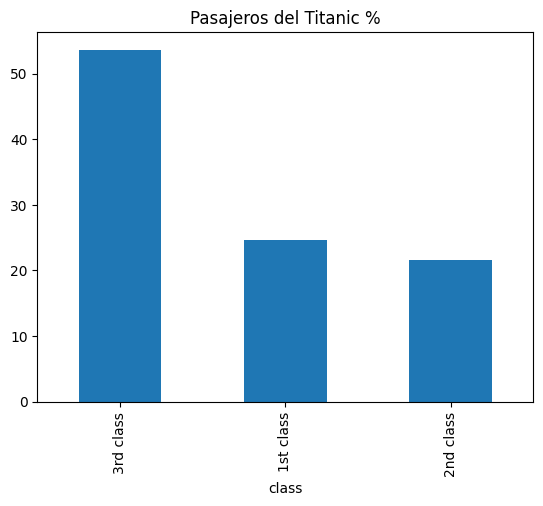

In [80]:
# gráfico de barras de frecuencias relativas.
plot = (100 * titanic['class'].value_counts() / len(titanic['class'])).plot(kind='bar', title='Pasajeros del Titanic %')
plot

### 2.1.4. Gráfico de pastel

---

El gráfico de pastel muestra el total de casos proporcionales a la fracción que cada categoría representa. 

Los gráfico de pastel dan una impresión rápida de cómo todo un grupo se divide en grupos más pequeños. Lo podríamos graficar del siguiente modo, también utilizando el método plot:

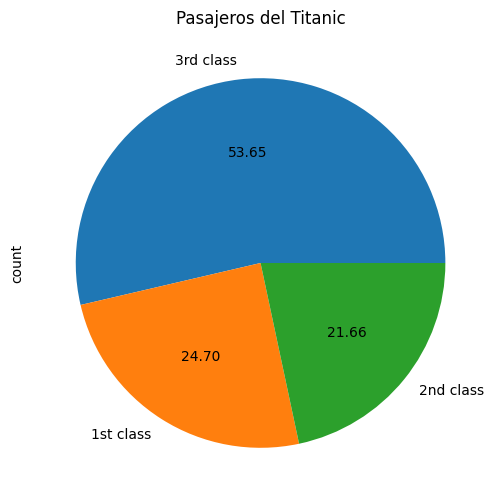

In [81]:
# Gráfico de tarta de pasajeros del Titanic
plot = titanic['class'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Pasajeros del Titanic')

Como se puede apreciar, con el gráfico de pastel no es tan fácil determinar que los pasajeros de tercera clase son más que el doble que los de primera clase; tampoco es fácil determinar si hay más pasajeros de primera o de segunda clase. Para este tipo de comparaciones, son mucho más útiles los gráficos de barras.

### 2.1.5. Relacionando variables categóricas¶

---

Al analizar la tragedia del Titanic, una de las preguntas que podríamos hacer es **¿existe alguna relación entre la clase de pasajeros y la posibilidad de alcanzar un bote salvavidas y sobrevivir a la tragedia?**. 

Para poder responder a esta pregunta, vamos a necesitar analizar a las variables **class** y **survived** de nuestro dataset en forma conjunta. 

---

Una buena forma de analizar dos variables categóricas en forma conjunta, es agrupar los recuentos en una tabla de doble entrada; este tipo de tablas se conocen en estadística con el nombre de tabla de contingencia. Veamos como podemos crear esta tabla utilizando la función **crosstab** de **Pandas**.

In [82]:
titanic

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


In [83]:
# Tabla de contingencia class / survived
pd.crosstab(index=titanic['survived'],
            columns=titanic['class'], margins=True)

class,1st class,2nd class,3rd class,All
survived,,,,
no,122,167,528,817
yes,203,118,178,499
All,325,285,706,1316


Los márgenes de la tabla, tanto en la derecha y en la parte inferior, nos muestran los totales. La línea inferior de la tabla representa la distribución de frecuencia de la clase de pasajeros. 

La columna derecha de la tabla es la distribución de frecuencia de la variable supervivencia. 

Cuando se presenta la información de este modo, cada celda de cada uno de los márgenes de la tabla representa la *distribución marginal* de esa variable en particular. 


Cada celda nos va a mostrar el recuento para la combinación de los valores de nuestras dos variables categóricas, en este caso **class** y **survived**.

---

Al igual de como habíamos visto con las tablas de frecuencia, también nos podría ser útil representar a las tablas de contingencia con porcentajes relativos; esto lo podríamos realizar utilizando el método apply del siguiente modo:

In [84]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=titanic['survived'], columns=titanic['class'],
            margins=True).apply(lambda r: r/len(titanic) *100,
                                axis=1)
# Es importante recordar que en la línea de código anterior, al estar usando Pandas, podemos realizar la operación
#APPLY, en donde realizamos un recorrido por el conjunto de datos, el cual estará considerando las líneas o renglones
#dependiendo la asignación de axis
# axis = 0 - renglones
# axis = 1 - columnas

# para este caso, es parecido el comportamiento de la tabla de contigencia
# pd.crosstab(index=titanic['survived'], columns=titanic['class'], margins=True).apply(lambda r: r/len(titanic) *100, axis=0)

class,1st class,2nd class,3rd class,All
survived,,,,
no,9.270517,12.689970,40.121581,62.082067
yes,15.425532,8.966565,13.525836,37.917933
All,24.696049,21.656535,53.647416,100.000000


Con esta tabla podemos ver fácilmente que solo el 37.91% de los pasajeros sobrevivió a la tragedia y que este 37% se compone de la siguiente forma: del total de pasajeros sobrevivió un 15.42% de pasajeros que eran de primera clase, un 8.97% que eran de segunda clase y un 13.52% que eran pasajeros de tercera clase.

---

Volviendo a nuestra pregunta inicial sobre la posibilidad de sobrevivir según la clase de pasajero, podría ser más útil armar la tabla de porcentajes como un porcentaje relativo sobre el total de cada fila, es decir calcular el porcentaje relativo que cada clase tiene sobre haber sobrevivido o no. Esto lo podemos realizar del siguiente modo:

In [85]:
# tabla de contingencia en porcentajes relativos segun sobreviviente
pd.crosstab(index=titanic['survived'], columns=titanic['class']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

# tabla de contingencia en porcentajes relativos segun sobreviviente con datos redondeados a 3 dig. significativos
# pd.crosstab(index=titanic['survived'], columns=titanic['class']).apply(lambda r: r/r.sum() *100, axis=1).round(3)

# Otro ejemplo de código para el redondeo
# pd.crosstab(index=titanic['survived'], columns=titanic['class']).apply(lambda r: round(r/len(titanic),5) *100, axis=1)

class,1st class,2nd class,3rd class
survived,,,
no,14.932681,20.440636,64.626683
yes,40.681363,23.647295,35.671343


Aquí podemos ver que de los pasajeros que sobrevivieron a la tragedia, el 40.68% correspondían a primera clase, el 35.67% a tercera clase y el 23.65% a segunda clase. Por tanto podríamos inferir que los pasajeros de primera clase tenían más posibilidades de sobrevivir.

---

Es más, también podríamos armar la tabla de porcentaje relativos en relación al total de cada clase de pasajero y así podríamos ver que de los pasajeros de primera clase, logró sobrevivir un 62.46%.

In [86]:
# tabla de contingencia en porcentajes relativos segun clase
pd.crosstab(index=titanic['survived'], columns=titanic['class']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

####### Como añadir otras clomnas a la tabla de contigencia

#np.round(pd.crosstab(index=titanic['survived'], 
#                     columns=[titanic['class'],titanic['sex']],
#                     margins=True).apply(lambda r: r/len(titanic) *100,axis=1),2) . Redondeado a 2 dig. sig.

#pd.crosstab(index=titanic['survived'], 
#                     columns=[titanic['class'],titanic['sex']],
#                     margins=True)

class,1st class,2nd class,3rd class
survived,,,
no,37.538462,58.596491,74.787535
yes,62.461538,41.403509,25.212465


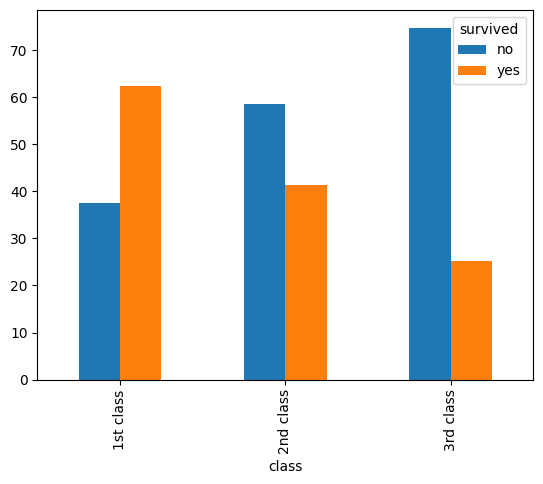

In [87]:
# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['class'],
            columns=titanic['survived']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

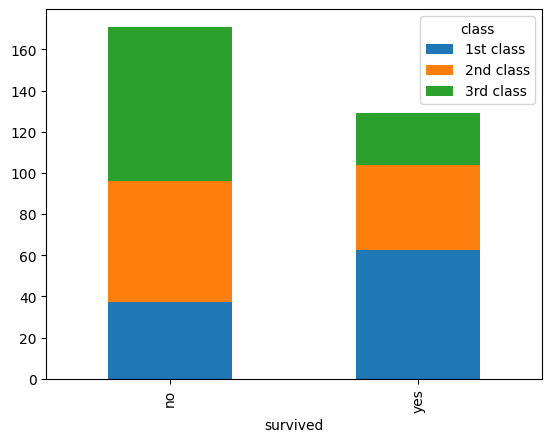

In [88]:
# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['survived'],
            columns=titanic['class']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

## Estas mismas manipulaciones las podemos realizar para otro tipo de combinación de variables categóricas, como podría ser el sexo o la edad de los pasajeros, pero eso ya se los dejo a ustedes para que se entretengan y practiquen un rato.

---

En esta sección, vamos a ver como podemos manipular, interpretar y obtener información de los datos cuantitativos.

# Recordemos que las **variables cuantitativas** son variables medidas en una escala numérica. 
Altura, peso, tiempo de respuesta, la calificación subjetiva del dolor, la temperatura, y la puntuación en un examen, son ejemplos de variables cuantitativas. 


Las variables cuantitativas se distinguen de las variables categóricas (también llamadas cualitativas) como el color favorito, religión, ciudad de nacimiento, y el deporte favorito; en las que no hay un orden o medida involucrados.

-----
-----
#  **Ejercicio Avanzado: Análisis de Supervivencia en el Titanic 🚢**

##  **Objetivo del Ejercicio**
En este ejercicio, analizaremos **cómo influyeron la clase, el género y la edad en la supervivencia de los pasajeros del Titanic**. Para ello, responderemos las siguientes preguntas:

1.  **¿Cuál fue la tasa de supervivencia por clase y género?**
2.  **¿Los niños tuvieron más probabilidades de sobrevivir que los adultos?**
3.  **¿Cómo podemos visualizar estos patrones con gráficos?**

---

### Análisis de Supervivencia por Clase y Género
Queremos saber si la clase y el género influyeron en la supervivencia.

🔹 Tarea: Crea una tabla de contingencia que muestre la cantidad de personas que sobrevivieron y no sobrevivieron en cada combinación de clase y género.

In [89]:
# Tabla de supervivencia por clase y género


                 No Sobrevivió  Sobrevivió  Total
class     sex                                    
1st class man              118          62    180
          women              4         141    145
2nd class man              154          25    179
          women             13          93    106
3rd class man              422          88    510
          women            106          90    196
All                        817         499   1316

Porcentaje de Supervivencia por Clase y Género:
                 Sobrevivió
class     sex              
1st class man     34.444444
          women   97.241379
2nd class man     13.966480
          women   87.735849
3rd class man     17.254902
          women   45.918367
All               37.917933


### Análisis de Supervivencia por Edad (Niños vs Adultos)
Queremos saber si los niños tuvieron más probabilidades de sobrevivir que los adultos.

🔹 Tarea:

  - Crea una nueva columna en el dataset que clasifique a los pasajeros en "Niño" o "Adulto" según la columna age.

  - Genera una tabla de contingencia con la tasa de supervivencia por edad.

In [90]:
# Crear una nueva columna para diferenciar entre niños y adultos



Tabla de Supervivencia por Edad:
           No Sobrevivió  Sobrevivió  Total
age_group                                  
Adulto               765         442   1207
Niño                  52          57    109
All                  817         499   1316

Porcentaje de Supervivencia por Edad:
           Sobrevivió
age_group            
Adulto      36.619718
Niño        52.293578
All         37.917933


## Comparación entre Clases y Edades
Ahora combinaremos clase y edad para ver si los niños de primera clase tuvieron más ventajas de supervivencia que los niños de tercera clase.

🔹 Tarea:
   - Crea una tabla que muestre la tasa de supervivencia por clase y grupo de edad.
   - Genera un gráfico de barras para visualizarlo.

In [91]:
# Tabla de supervivencia por clase y edad




Supervivencia por Clase y Grupo de Edad:
                     No Sobrevivió  Sobrevivió  Total
class     age_group                                  
1st class Adulto               122         197    319
          Niño                   0           6      6
2nd class Adulto               167          94    261
          Niño                   0          24     24
3rd class Adulto               476         151    627
          Niño                  52          27     79
All                            817         499   1316

Porcentaje de Supervivencia por Clase y Edad:
                     Sobrevivió
class     age_group            
1st class Adulto      61.755486
          Niño       100.000000
2nd class Adulto      36.015326
          Niño       100.000000
3rd class Adulto      24.082935
          Niño        34.177215
All                   37.917933


----
----
----

### 2.1.6. Analizando datos cuantitativos con Python

---

Para los ejemplos de esta sección, vamos a trabajar con el dataset **faithful**, el cual consiste en una colección de observaciones sobre las erupciones del géiser Old Faithful en el parque nacional Yellowstone de los Estados Unidos. La información que contiene este dataset es la siguiente:


In [92]:
#En esta sección seguimos utilizando la paquetería de 'pydataset', en caso de ser necesario, 
#habilita y ejecuta las siguientes líneas de código

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
%matplotlib inline 

faithful = data('faithful')
faithful

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
...,...,...
268,4.117,81
269,2.150,46
270,4.417,90
271,1.817,46


In [93]:
faithful.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 1 to 272
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


In [94]:
faithful.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


Como podemos ver, faithful es un dataset bastante simple que solo contiene observaciones de dos variables; la primera, que se llama eruptions, contiene la información de la duración de la erupción del géiser; mientras que la segunda, se llama waiting y contiene la información sobre el tiempo de espera para la siguiente erupción del géiser.

---

Al igual de como comentábamos cuando analizamos datos categóricos, lo primero que deberíamos intentar hacer es crear una imagen que represente de la mejor manera posible a nuestros datos, ya que nuestro cerebro tiende a procesar mejor la información visual. Para el caso de las variables cuantitativas, un buen candidato para comenzar a hacernos una imagen de lo que nuestros datos representan, son los **histogramas**.

### 2.1.7. Histogramas

---

Para las variables cuantitativas, a diferencia de lo que pasaba con las variables categóricas, no existe una forma obvia de agrupar los datos; por tal motivo lo que se suele hacer es, dividir los posibles valores en diferentes contenedores del mismo tamaño y luego contar el número de casos que cae dentro de cada uno de los contenedores. 


Estos contenedores junto con sus recuentos, nos proporcionan una imagen de la distribución de la variable cuantitativa y constituyen la base para poder graficar el histograma. 


Para construir el gráfico, simplemente debemos representar a los recuentos como barras y graficarlas contra los valores de cada uno de los contenedores.


**Con Python podemos representar fácilmente el histograma de la variable eruptions utilizando el método *hist* del DataFrame de *Pandas* del siguiente modo**:

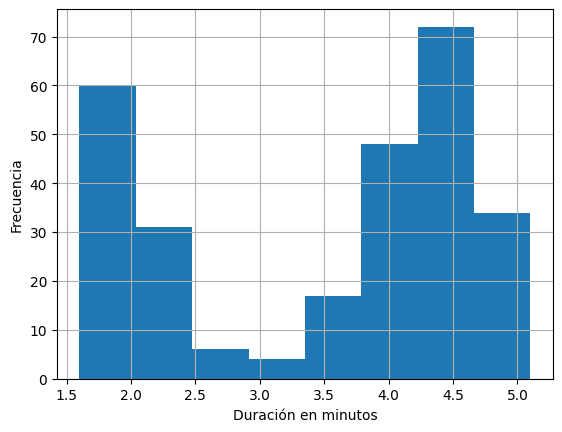

In [95]:
# histograma duración de erupciones con 8 barras
faithful['eruptions'].hist(bins=8) 
plt.xlabel("Duración en minutos")
plt.ylabel("Frecuencia")
plt.show()

---

Como podemos ver con este gráfico, la duración más frecuente de las erupciones del géiser ronda en alrededor de cuatro minutos y medio. Una cosa que debemos hacer notar es que en los histogramas, los contenedores dividen a todos los valores de la variable cuantitativa, por lo que no deberíamos encontrar espacios entre las barras (a diferencia de lo que pasaba con los gráficos de barras que vimos en el artículo anterior). 


Cualquier espacio entre las barras es una brecha en los datos, que nos indica un región para la que no existen valores.

---

### 2.1.8. Distribución de frecuencia
---

Un tema íntimamente relacionado con los histogramas son las tablas de distribución de frecuencia, en definitiva los histogramas no son más que gráficos de tablas de distribución de frecuencia. La distribución de frecuencia de una variable cuantitativa consiste en un resumen de la ocurrencia de un dato dentro de una colección de categorías que no se superponen.

Estas categorías las vamos a poder armar según nuestra conveniencia y lo que queramos analizar. Por ejemplo si quisiéramos armar la distribución de frecuencia de la variable eruptions podríamos realizar las siguiente manipulaciones con Pandas:

In [96]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.
contenedores = np.arange(1.5, 6., 0.5)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(faithful['eruptions'], contenedores)

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = frec.value_counts()
tabla_frec

eruptions
(4.0, 4.5]    75
(1.5, 2.0]    55
(4.5, 5.0]    54
(2.0, 2.5]    37
(3.5, 4.0]    34
(3.0, 3.5]     9
(2.5, 3.0]     5
(5.0, 5.5]     3
Name: count, dtype: int64

Como nos nuestra esta tabla de distribución de frecuencia, la duración que más veces ocurre para las erupciones, se encuentran en el rango de 4 a 4.5 minutos.

---

### 2.1.9. Diagrama de dispersión
---

Hasta aquí venimos graficando únicamente una sola variable cuantitativa pero **¿qué pasa si queremos trabajar con dos variables?** Para estos casos existe el diagrama de dispersión. 

El *diagrama de dispersión* es una de las formas más comunes que existen para visualizar datos y constituye una de las mejores forma de observar relaciones entre dos variables cuantitativas. 

Veremos que se puede observar un montón de cosas por el solo hecho de mirar. 

---
Este diagrama es una de las mejores formas de visualizar las asociaciones que pueden existir entre nuestros datos.

El diagrama de dispersión empareja los valores de dos variables cuantitativas y luego los representa como puntos geométricos dentro de un diagrama cartesiano. 

Por ejemplo, volviendo a nuestro dataset faithful, podríamos emparejar a las variables eruptions y waiting en la misma observación como coordenadas (x, y) y luego graficarlas en el eje cartesiano. 

Con la ayuda de Python podríamos generar el diagrama de dispersión del siguiente modo:

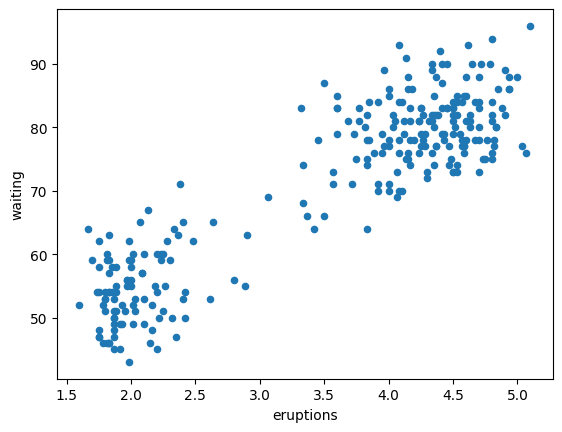

In [97]:
# diagrama de dispersión
disp= faithful.plot(kind='scatter', x='eruptions', y='waiting')

Como podemos ver con solo observar la dispersión de los datos parece existir una relación lineal entre los datos de este dataset....

-----
-----
#  **Ejercicio Avanzado: Visualización y creación de variable de Erupciones**

## Visualización de la Distribución de las Erupciones
Es importante visualizar cómo se distribuyen los datos.

🔹 Tarea:
   - Recrea los siguientes histogramas para visualizar la distribución de duración de erupciones y tiempo de espera.

   - Agrega líneas que marquen la media y la mediana.

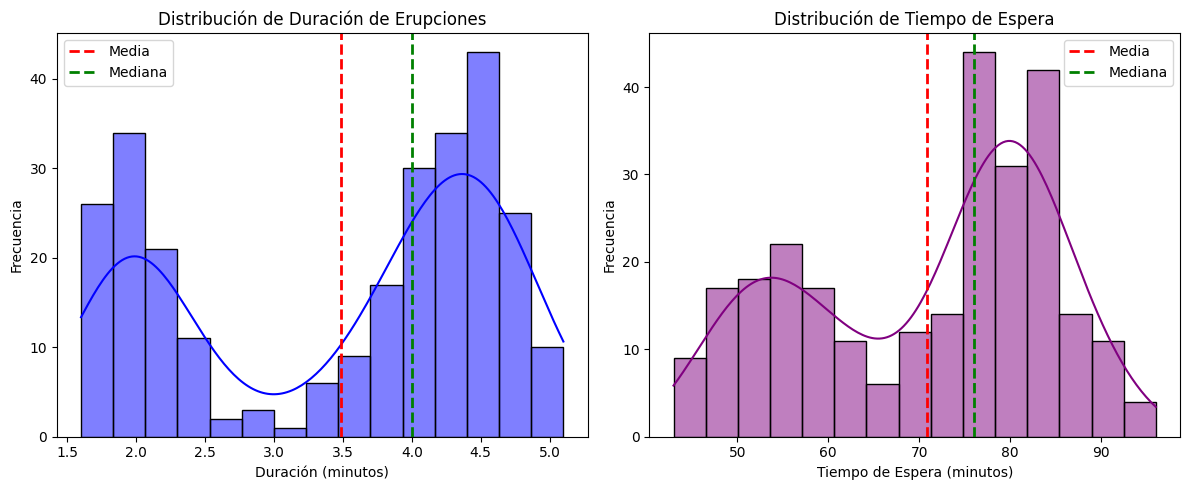

In [98]:
plt.figure(figsize=(12,5))

# Histograma de duración de erupciones
plt.subplot(1,2,1)

# Histograma de tiempo de espera
plt.subplot(1,2,2)


plt.tight_layout()
plt.show()


## Clasificación de Erupciones en Cortas y Largas
Para mejorar el análisis, clasificaremos las erupciones en cortas y largas, usando la mediana como referencia.

🔹 Tarea:
✔️ Crea una nueva columna tipo_erupcion donde:

Si la duración es menor a la mediana, la etiqueta será "Corta".
Si la duración es mayor o igual a la mediana, la etiqueta será "Larga".
✔️ Calcula la tasa promedio de espera para cada tipo.


 Tiempo de Espera Promedio por Tipo de Erupción:
 tipo_erupcion
Corta    60.611940
Larga    80.884058
Name: waiting, dtype: float64


In [100]:
faithful

,eruptions,waiting,tipo_erupcion
1,3.600,79,Corta
2,1.800,54,Corta
3,3.333,74,Corta
4,2.283,62,Corta
5,4.533,85,Larga
...,...,...,...
268,4.117,81,Larga
269,2.150,46,Corta
270,4.417,90,Larga
271,1.817,46,Corta


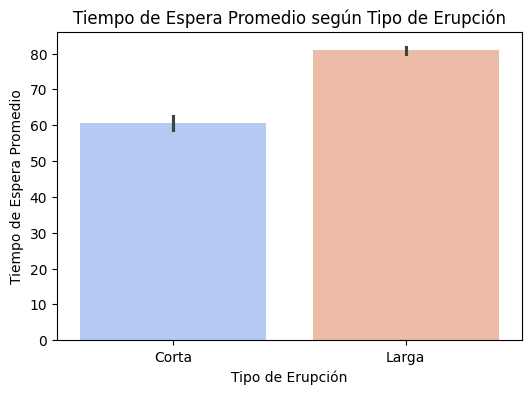

In [101]:
plt.figure(figsize=(6,4))

plt.show()